In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
from datetime import timedelta


In [130]:
# Read the data
df = pd.read_csv('day_ahead_energy_prices.csv', parse_dates=['date'])
 
# Filter data for the last 6 months
end_date = df['date'].max()
start_date = end_date - timedelta(days=180)
df = df[(df['date'] >= start_date) & (df['date'] <= end_date)].reset_index(drop=True)
df

,date,hourly day-ahead energy price
0,2024-10-29 22:00:00+00:00,103.09
1,2024-10-29 21:00:00+00:00,118.08
2,2024-10-29 20:00:00+00:00,124.05
3,2024-10-29 19:00:00+00:00,140.60
4,2024-10-29 18:00:00+00:00,203.82
...,...,...
4316,2024-05-03 02:00:00+00:00,59.14
4317,2024-05-03 01:00:00+00:00,58.50
4318,2024-05-03 00:00:00+00:00,57.95
4319,2024-05-02 23:00:00+00:00,59.14


In [139]:
# Rename columns for Prophet 
df.rename(columns={'date': 'ds', 'hourly day-ahead energy price': 'y'}, inplace=True)

# Ensure the datetime column is correctly formatted
df['ds'] = pd.to_datetime(df['ds'])
df['ds'] = df['ds'].dt.tz_localize(None)  # Remove timezone information

In [133]:
# Initialize the Prophet model
m = Prophet()
m.fit(df)


18:16:13 - cmdstanpy - INFO - Chain [1] start processing
18:16:13 - cmdstanpy - INFO - Chain [1] done processing


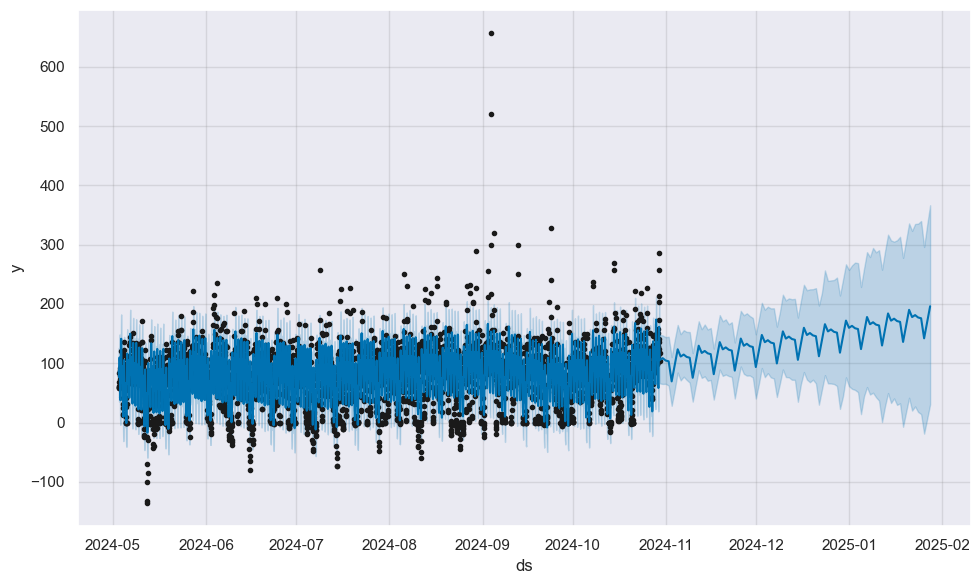

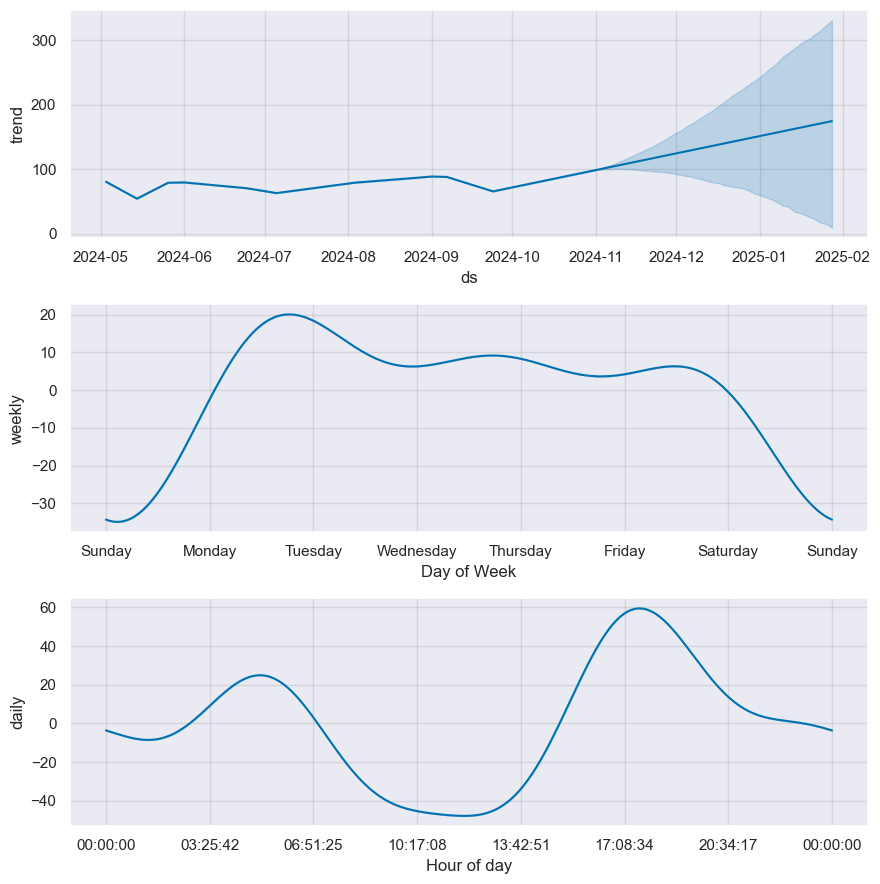

"\nplt.title('Forecasted Energy Prices')\nplt.xlabel('Date')\nplt.ylabel('Energy Price')\nplt.axvline(x=end_date, color='red', linestyle='--')  # Line indicating the end of historical data\n"

In [136]:
# Create a DataFrame to hold future dates (for 3 months ahead)
future = m.make_future_dataframe(periods=90)  # For 90 days ahead

# Make predictions
forecast = m.predict(future)

# Plot the results
fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)
plt.show()

'''
plt.title('Forecasted Energy Prices')
plt.xlabel('Date')
plt.ylabel('Energy Price')
plt.axvline(x=end_date, color='red', linestyle='--')  # Line indicating the end of historical data
'''

In [166]:
# Calculate Daily Average Prices
daily_avg = df.resample('D', on='ds').mean().reset_index()
# Ensure the datetime column is correctly formatted
daily_avg['ds'] = pd.to_datetime(daily_avg['ds'])
daily_avg['ds'] = daily_avg['ds'].dt.tz_localize(None)  # Remove timezone information
daily_avg


,ds,y
0,2024-05-02,60.520000
1,2024-05-03,80.207500
2,2024-05-04,75.014167
3,2024-05-05,53.616667
4,2024-05-06,93.112917
...,...,...
176,2024-10-25,115.230833
177,2024-10-26,99.689167
178,2024-10-27,90.738750
179,2024-10-28,111.586250


18:28:20 - cmdstanpy - INFO - Chain [1] start processing
18:28:20 - cmdstanpy - INFO - Chain [1] done processing


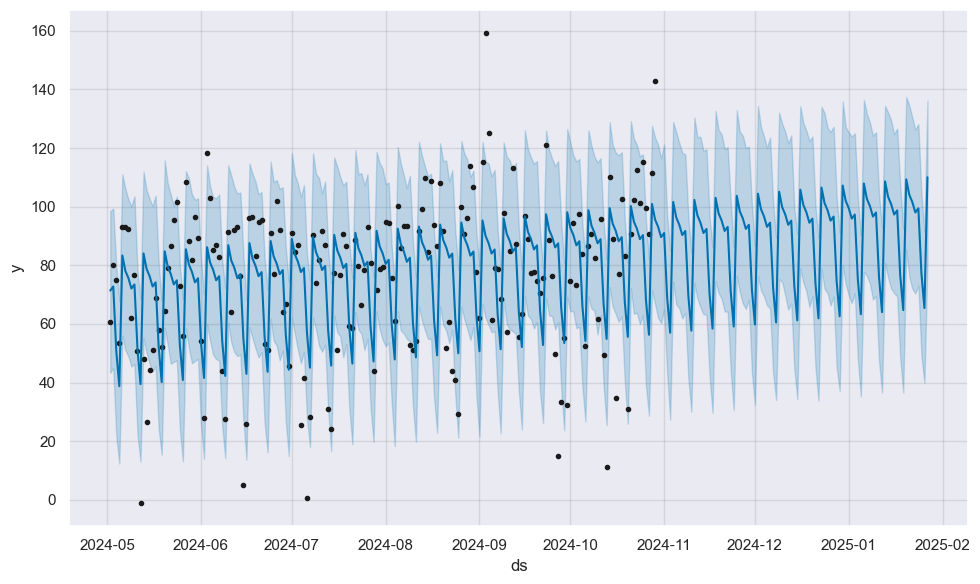

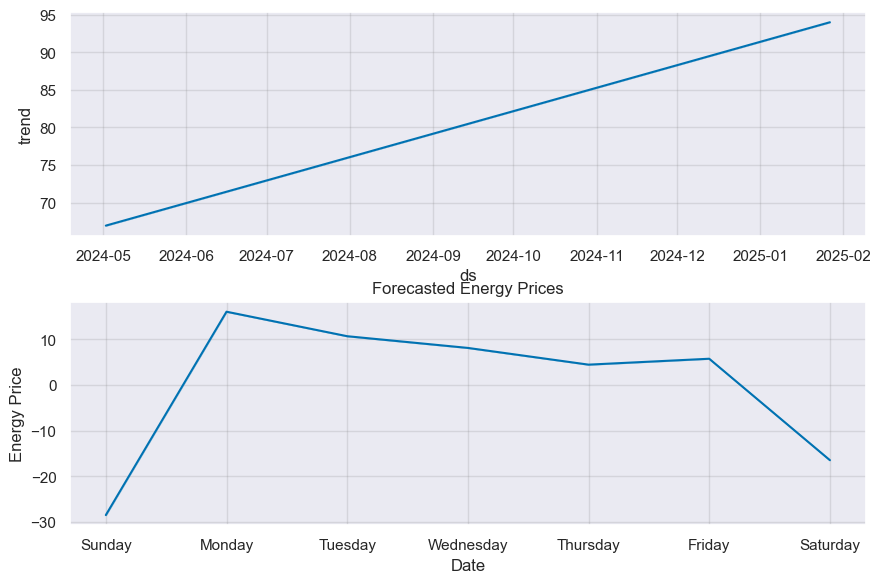

In [168]:
# Initialize the Prophet model
m = Prophet()
m.fit(daily_avg)

# Create a DataFrame to hold future dates (for 3 months ahead)
future = m.make_future_dataframe(periods=90)  # For 90 days ahead

# Make predictions
forecast = m.predict(future)

# Plot the results
fig3 = m.plot(forecast)
fig4 = m.plot_components(forecast)
plt.title('Forecasted Energy Prices')
plt.xlabel('Date')
plt.ylabel('Energy Price')
plt.show() 

In [137]:
forecast_daily = model_daily.predict(future_daily)
forecast_daily

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2024-05-02,66.932241,45.860255,100.257020,66.932241,66.932241,4.437983,4.437983,4.437983,4.437983,4.437983,4.437983,0.0,0.0,0.0,71.370224
1,2024-05-03,67.032455,46.104822,100.387948,67.032455,67.032455,5.730321,5.730321,5.730321,5.730321,5.730321,5.730321,0.0,0.0,0.0,72.762776
2,2024-05-04,67.132669,20.594780,79.117786,67.132669,67.132669,-16.465344,-16.465344,-16.465344,-16.465344,-16.465344,-16.465344,0.0,0.0,0.0,50.667325
3,2024-05-05,67.232882,11.021964,68.098771,67.232882,67.232882,-28.482620,-28.482620,-28.482620,-28.482620,-28.482620,-28.482620,0.0,0.0,0.0,38.750263
4,2024-05-06,67.333096,57.095339,111.917041,67.333096,67.333096,16.022074,16.022074,16.022074,16.022074,16.022074,16.022074,0.0,0.0,0.0,83.355170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,2025-01-23,93.588947,71.138481,127.017490,93.588934,93.588959,4.437983,4.437983,4.437983,4.437983,4.437983,4.437983,0.0,0.0,0.0,98.026930
267,2025-01-24,93.689160,70.727947,127.658597,93.689147,93.689173,5.730321,5.730321,5.730321,5.730321,5.730321,5.730321,0.0,0.0,0.0,99.419482
268,2025-01-25,93.789373,51.911991,104.775424,93.789360,93.789386,-16.465344,-16.465344,-16.465344,-16.465344,-16.465344,-16.465344,0.0,0.0,0.0,77.324030
269,2025-01-26,93.889586,36.128460,92.472182,93.889573,93.889599,-28.482620,-28.482620,-28.482620,-28.482620,-28.482620,-28.482620,0.0,0.0,0.0,65.406966


In [169]:
# Calculate Biweekly Average Prices
biweekly_avg = df.resample('2W', on='ds').mean().reset_index()
biweekly_avg.columns = ['ds', 'y']

# Ensure the datetime column is correctly formatted
biweekly_avg['ds'] = pd.to_datetime(biweekly_avg['ds'])
biweekly_avg['ds'] = biweekly_avg['ds'].dt.tz_localize(None) # Remove timezone information
biweekly_avg.columns

Index(['ds', 'y'], dtype='object')

18:28:26 - cmdstanpy - INFO - Chain [1] start processing
18:28:26 - cmdstanpy - INFO - Chain [1] done processing


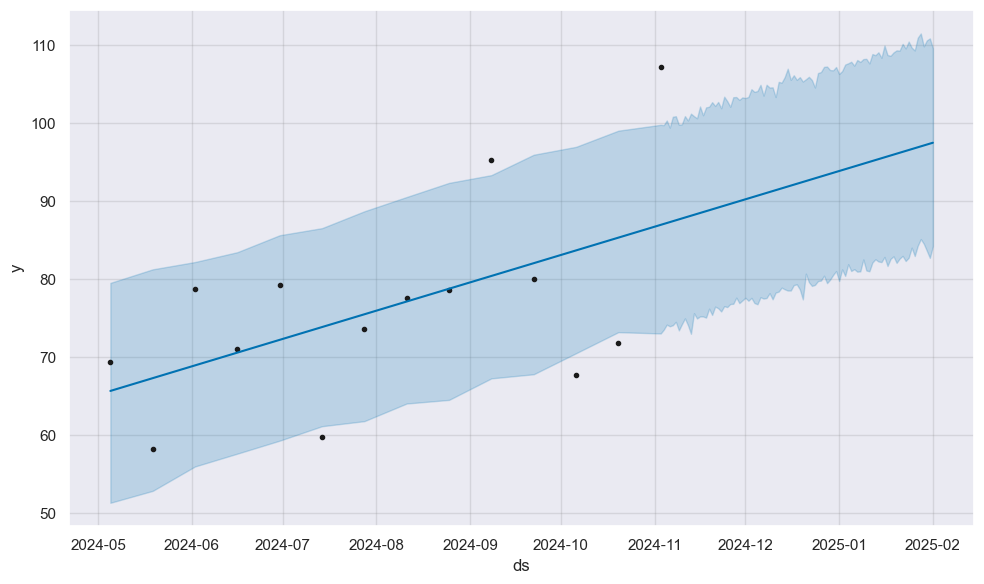

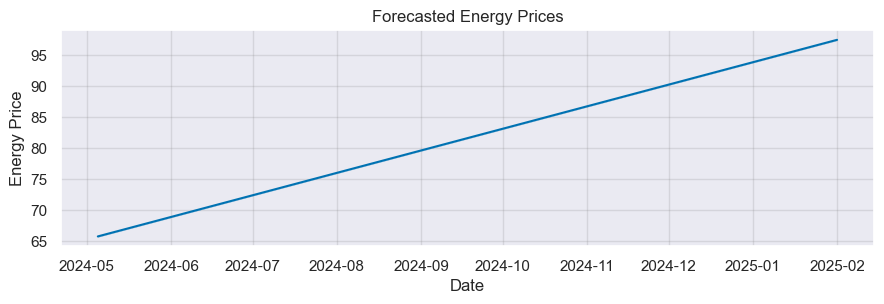

In [170]:
# Initialize the Prophet model
m = Prophet()
m.fit(biweekly_avg)

# Create a DataFrame to hold future dates (for 3 months ahead)
future = m.make_future_dataframe(periods=90) 

# Make predictions
forecast = m.predict(future)

# Plot the results
fig5 = m.plot(forecast)
fig6 = m.plot_components(forecast)
plt.title('Forecasted Energy Prices')
plt.xlabel('Date')
plt.ylabel('Energy Price')
plt.show() 
